# 分类与回归树（CART）

CART是在给定输入随机变量X条件下输出随即变量Y的条件概率分布的学习方法。CART假设决策树是二叉树，内部节点特征的取值为“是”和“否”，左右两个分支分别是不同取值的分支，比如左分支代表“是”，右分支代表“否”。这样的决策树等价于递归地二分每个特征，将输入空间即特征空间划分为有限个单元，并在这学单元上确定预测的概率分布，也就是在输入给定的条件下输出的条件概率分布。  

CART算法由两步组成：
* 决策树生产：基于训练数据集生成决策树，生成的决策树要尽量大；
* 决策树剪枝：用验证数据集对已生成的数进行剪枝并选择最优子树，这时用损失函数最小作为剪枝的标准。

### 分类树的生成

#### 基尼指数 

分类问题中，假设有K个类，样本点属于第k类的概率为 $p_k$，则概率分布的基尼指数定义为
$$ Gini(p) = \sum_{k=1}^K p_k(1-p_k) =1 - \sum_{k=1}^K p_k^2 $$ 

对于给定的样本集合D，其基尼指数为
$$  Gini(p) = 1 - \sum_{k=1}^K (\frac{|C_k|}{|D|})^2$$
其中$C_k$是D中属于第k类的样本子集（个数），K是类的个数。

如果样本集合D根据特征A是否取某一可能值a被分割成$D_1,D_2$两部分，则在特征A的条件下，集合D的基尼指数定义为
$$ Gini(D,A) = \frac{|D_1|}{|D|}Gini(D_1) +  \frac{|D_2|}{|D|}Gini(D_2)$$  

基尼指数Gini(D)表示集合D的不确定性，基尼指数Gini(D,A)表示经A=a分割后集合D的不确定性。基尼指数越大，样本集合的不确定性也就越大，这一点与熵相似。

#### CART生成算法

输入：训练数据集D  
输出：CART决策树  
根据训练数据集，从根结点开始，递归地对每个结点进行一下操作，构建二叉决策树：  

（1）设结点的训练数据集为D，计算现有特征对数据集的基尼指数Gini(D)。此时，对每一个特征A，对其可能取的每个值a，根据样本带你A=a的测试为“是”或“否”将D分割成D1和D2两部分，计算A=a划分后的基尼指数，即Gini(D,A)。  

（2）在所有可能的特征A以及他们所有可能的切分点a中，选择基尼指数最小的特征及其对应的切分点作为最优特征与最优切分点。依最优特征与最优切分点，从现结点生成两个子节点，将训练数据集特征一次分配到两个子结点中去。

（3）对两个子结点递归调用（1），（2），直至满足停止条件。
（4）生成CART树。

算法停止计算的条件是结点中的样本数小于预订阈值，或样本集的基尼指数小于预订值（样本基本属于同一类），或者没有更多特征。


在下面的代码中加入了两个额外停止条件：一是树的高度是否达到了设定的阈值，二是每次划分后基尼指数是否会有足够的减小（之差大于设定的阈值）

#### CART剪枝

CART剪枝算法从“完全生长”的决策树的低端减去一些子树，使决策树变小（模型变简单），从而能够对未知数据有更准确的预测。CART剪枝算法由两步组成：首先从生成算法产生的决策树$T_0$低端开始剪枝，直到$T_0$的根节点，形成一个子树序列{$T_0,T_1,...,T_n$}；然后通过交叉验证法在独立的验证集上对子树序列进行预测，从中选择最优子树。  

在剪枝过程中，计算子树的损失函数：$$ C_{\alpha}(T) = C(T) + \alpha|T| $$  
其中，T为任意子树，C(T)为对训练数据集的预测误差（如基尼指数），|T|为子树的**叶结点**个数，$\alpha \ge 0$ 为参数，$C_{\alpha}(T)$为参数α时子树T的整体损失，参数α权衡数据的拟合程度与模型的复杂度。  

对固定的α，一定存在使损失函数$C_{\alpha}(T)$最小的子树，表示为$T_\alpha$。$T_\alpha$在损失函数$C_{\alpha}(T)$最小的意义下是最优的。

具体地，从整体数$T_0$开始剪枝。对$T_0$的任意内部节点t，以t为单节点数的损失函数为 $$ C_{\alpha}(T) = C(T) + \alpha $$  
以t为根结点的子树$T_t$的损失函数是$$ C_{\alpha}(T_t) = C(T_t) + \alpha|T_t| $$  

当 α=0及α充分小时，有不等式 $$ C_{\alpha}(T_t) < C_\alpha(t) $$
当α增大时，在某一α有 $$ C_{\alpha}(T_t) = C_\alpha(t) $$  

当α再增大时，上面的不等式反向，只要 $ \alpha = \frac{C(t) - C(T_t)}{|T_t|-1}$，$T_t$与t有相同的损失函数值，而t的节点少，因此t比$T_t$更可取，对$T_t$进行剪枝。

为此，对$T_0$中每一内部节点t计算 $$ g(t) = \frac{C(t) - C(T_t)}{|T_t|-1} $$
它表示剪枝后整体损失函数的减少程度。在$T_0$中减去g(t)最小的$T_t$，将得到的子树作 $T_1$，同时将最小的g(t)设为 $\alpha_1$。$T_1$为区间[$\alpha_1,\alpha_2$)的最优子树。

如此剪枝下去，直至得到根节点。在这一过程中，不断地增加α的值，产生新的区间。

特别的 这里的C(t)是对训练数据的预测误差，计算方式为：结点预测错误样本数/结点样本总数 * 结点样本总数/总样本数  
$C(T_t)$计算是只计算叶结点（不要计算路径中的根节点）

下面剪枝的代码中，通过给定的正则化参数α进行剪枝，没有做对α的不同取值下的最优子树计算，没有做采用交叉验证法选取最优子树。

### 回归树生成

回归树的生产步骤和分类树一摸一样，只是选取的评价指标不同。把基尼指数替换成平方误差，剪枝时的预测误差换成平方误差，结点保存的值改为该结点样本标签的平均值。

In [1]:
import numpy as np

class TreeNode:
    def __init__(self,feature_idx=None,feature_val=None,node_val=None,
                 left_child=None,right_child=None):
        self._feature_idx = feature_idx #该结点对应的划分特征索引
        self._feature_val = feature_val #feature_val
        self._node_val = node_val       #该结点存储的值，只有叶结点才存储类别信息，回归树存储结点的平均值，分类树存储类别出现次数最多的类别
        self._left_child = left_child   #左子树
        self._right_child = right_child #右子树
        self._y = None #记录该节点对应的标签集,用于树剪枝时计算当前节点的基尼指数或者平方差


class CART:
    pass

    def __init__(self, min_sample=2, min_gain=1e-6, max_depth=np.inf):
        pass
        """
        min_sample:
            当数据集样本数少于min_sample时不再划分
        min_gain:
            如果划分后收益不能超过该值则不进行划分
            对分类树来说基尼指数需要有足够的下降
            对回归树来说平方误差要有足够的下降
        max_depth:
            树的最大高度
        """
        self._root = None
        self._min_sample = min_sample
        self._min_gain = min_gain
        self._max_depth = max_depth

    def _clac_evaluation(self,y):
        pass
        """求基尼指数或者平方差，由子类实现"""
        return NotImplementedError()

    def _calc_val(self,y):
        pass
        """计算众数或着平均数,由子类实现"""
        return NotImplementedError()

    def _clac_divide_evaluation(self,y1,y2):
        pass
        """计算划分后的基尼指数或者平方差"""
        return NotImplementedError()

    def _continue_divide(self,X,y,cur_depth):
        pass
        """判断是否继续划分"""
        """
        条件1：剩余的样本数是否少于最小样本数
        条件2：当前的树的高度是否超过最大高度
        条件3：当前是有只有一个分类
        """
        if len(X)< self._min_sample \
                or cur_depth > self._max_depth \
                or np.unique(y).shape[0] == 1 :
            return False
        return True

    def _build_tree(self,X,y,cur_depth=0):
        pass
        """ 构建树"""
        #判断当前集合是否满足继续划分的条件
        if self._continue_divide(X,y,cur_depth):
            samples_n,feature_n = X.shape
            min_evaluation = np.inf
            min_evaluation_feature_idx = None
            min_evaluation_feature_idx_value = None;
            min_evaluation_D1 = []
            min_evaluation_D2 = []
            min_evaluation_y1 = []
            min_evaluation_y2 = []

            for feature_idx in range(feature_n): #选择一个特征的索引
                fearure_value = np.unique(X[:,feature_idx])
                for v in fearure_value:  #选择这个特征索引下的切分点的取值
                    temp = X[:,feature_idx]
                    D1_idx = np.argwhere(temp < v).ravel()  #通过该特征把数据集分成了两部分
                    D1 = X[D1_idx]
                    y1 = y[D1_idx]

                    D2_idx = np.argwhere(temp >= v).ravel()
                    D2 = X[D2_idx]
                    y2 = y[D2_idx]

                    if len(D1)==0 or len(D2)==0:
                        continue
                    Evaluation_D_A = self._clac_divide_evaluation(y1,y2) #求在特征A的条件下，集合的评价指数
                    if Evaluation_D_A < min_evaluation:  #选择评价指数最小的特征和特征取值
                        min_evaluation = Evaluation_D_A
                        min_evaluation_feature_idx = feature_idx
                        min_evaluation_feature_idx_value = v
                        min_evaluation_D1 = D1
                        min_evaluation_D2 = D2
                        min_evaluation_y1 = y1
                        min_evaluation_y2 = y2

            #判断此次划分是否会有足够的收获
            if self._clac_evaluation(y) -min_evaluation > self._min_gain:
                #构建该节点
                node = TreeNode(feature_idx =min_evaluation_feature_idx,feature_val= min_evaluation_feature_idx_value)
                #递归构建左子树
                node._left_child = self._build_tree(min_evaluation_D1,min_evaluation_y1,cur_depth=cur_depth+1)

                #递归构建有子树
                node._right_child = self._build_tree(min_evaluation_D2,min_evaluation_y2,cur_depth=cur_depth+1)
                node._y = y

                return node
            else:
                val = self._calc_val(y)
                node = TreeNode(node_val= val)
                node._y = y
                return node

        else:
            if len(y) ==0:
                return None
            val = self._calc_val(y)
            node = TreeNode(node_val= val)
            node._y = y
            return node


    def fit(self,X,y):
        self._sample_nums = X.shape[0] #记录训练样本的总数
        self._root = self._build_tree(X,y)

    def _clac_leaf_error(self,node):
        return NotImplementedError()

    def _clac_predict_error(self,node,isLeaf = False):
        pass
        """计算子树的分类误差率"""
        """
            node表示要计算该节点为根节点的子树的叶子数和误差率
            isLeaf 表示改节点是否直接作为叶子节点
            返回的第一个数是叶子节点的个数
            返回的第二个数是该子树的误差率
        """
        if isLeaf: #当前节点已经是叶节点
            return 1,self._clac_leaf_error(node)
        else:
            if node !=None:
                if node._node_val != None:
                    return 1,self._clac_leaf_error(node)
                left_leaves,left_error = self._clac_predict_error(node._left_child)
                right_leaves,right_error = self._clac_predict_error(node._right_child)
                return left_leaves+right_leaves,left_error+right_error
            return 0,0

    def prune(self,alpha = np.exp(-7)):
        pass
        """对已经生成的树进行剪枝"""
        self._excute_prune(self._root,alpha= alpha)
        return NotImplementedError

    def _excute_prune(self,node,alpha):
        pass
        """执行剪枝操作"""
        #如果分支不是叶节点，则对其进行剪枝
        if node._left_child._node_val == None:
            self._excute_prune(node._left_child,alpha)
        if node._right_child._node_val == None:
            self._excute_prune(node._right_child,alpha)

        #左子树叶节点的数量,左子树的误差率
        left_leaves,left_error = self._clac_predict_error(node._left_child,isLeaf = False)
        #右子树叶节点的数量,右子树的误差率
        right_leaves,right_error = self._clac_predict_error(node._right_child,isLeaf = False)
        #以当前节点为叶节点的损失函数
        node_leaf_error = self._clac_predict_error(node,isLeaf = True)[1] + alpha
        #以当前节点为根节点的子树的损失函数
        node_error = left_error +right_error + alpha*(left_leaves+right_leaves)
        #loss_reduce 表示剪枝后整体损失函数的减少程度
        loss_reduce = (node_error - node_leaf_error)

        #print(node_leaf_error,node_error)

        #如果loss_reduce大于0，则表示何把当前节点作为叶节点，损失会减少，等于0则表示不变（也应该进行剪枝，因为节点数变少）
        if loss_reduce >= 0:
            node._node_val = self._calc_val(node._y)
            node._left_child = None
            node._right_child = None


    def predict(self,X_test):
        pass
        y_predoct = []
        for i in range(len(X_test)):
            node = self._root
            x = X_test[i]
            while node!=None:
                if node._node_val != None : #非叶节点上的值为None
                    y_predoct.append(node._node_val)
                    break
                elif x[node._feature_idx] >= node._feature_val:
                    node = node._right_child
                else:
                    node = node._left_child
        return y_predoct

    def nodes_nums(self):
        node = self._root;
        self._nodes_num = 0
        self._leaves_num = 0
        self._preOrder(node)
        return  self._nodes_num,self._leaves_num

    def _preOrder(self,node):
        if node is not None:
            self._nodes_num += 1
            if node._node_val != None:
                self._leaves_num +=1
            self._preOrder(node._left_child)
            self._preOrder(node._right_child)


class CARTClassification(CART):

    def _clac_evaluation(self,y):
        pass
        """求基尼指数"""
        samples_n = len(y)
        _,categoties = np.unique(y,return_counts=True) #现有的各个类别的数量
        Gini = 1
        for k in categoties:
            Gini -= pow(k/samples_n,2)  #求各个类别对应的记录数/总数量
        return Gini

    def _calc_val(self,y):
        pass
        """计算众数"""
        counts = np.bincount(y)
        mode = np.argmax(counts)
        return mode

    def _clac_divide_evaluation(self,y1,y2):
        pass
        """计算划分后的基尼指数"""
        return  len(y1)/(len(y1)+len(y2))*self._clac_evaluation(y1) + len(y2)/(len(y1)+len(y2))*self._clac_evaluation(y2)

    def _clac_leaf_error(self,node):
        pass
        """计算叶子节点的误差率"""
        _,counts = np.unique(node._y,return_counts=True) #现有的各个类别的数量
        if counts.shape[0] == 1:
            return 0
        sample_num = self._sample_nums #训练集的总的样本数

        #当前样本的误差率 * 当前样本的数量和总样本数的比值
        #简化为当前样本错误错误样本数 / 总样本的数量
        #从1开始切片是因为 counts[0]是预测正确的样本数量
        #print(counts.shape,counts[1:].shape)
        error =  np.sum(counts[1:])/sample_num
        return error

    def prune(self,alpha = np.exp(-7)):
        pass
        """对已经生成的树进行剪枝"""
        self._excute_prune(self._root,alpha= alpha)




class CARTRegression(CART):

    def _clac_evaluation(self,y):
        pass
        """求平方差"""
        mean = y.mean()
        evaluation = 0
        for v in y:
            evaluation += pow(v-mean,2)
        return evaluation

    def _calc_val(self,y):
        pass
        """计算平均值"""
        return y.mean()

    def _clac_divide_evaluation(self,y1,y2):
        pass
        """计算划分后的平方差"""
        return  self._clac_evaluation(y1) + self._clac_evaluation(y2)

    def _clac_leaf_error(self,node):
        pass
        """计算叶子节点的平方差"""
        return self._clac_evaluation(node._y)

    def prune(self,alpha = np.e):
        pass
        """对已经生成的树进行剪枝"""
        self._excute_prune(self._root,alpha= alpha)



测试分类树

剪枝前树的节点数量和叶节点数量： (251, 126)
剪枝前的预测正确率： 97.0 %
剪枝后树的节点数量和叶节点数量： (57, 29)
剪枝后的预测正确率： 97.48 %


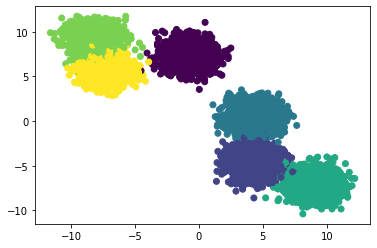

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


np.set_printoptions(suppress=True)
x_samples,y_samples = make_blobs(centers=6,n_samples=10000)

X_train, X_test, y_train, y_test = train_test_split(x_samples, y_samples)

myCARTC = CARTClassification(max_depth=10,min_sample=5)
myCARTC.fit(X_train,y_train)
print("剪枝前树的节点数量和叶节点数量：",myCARTC.nodes_nums())
y_predict = myCARTC.predict(X_test)
print("剪枝前的预测正确率：",np.sum(y_predict == y_test)/len(y_test)*100,'%')
myCARTC.prune(alpha = np.exp(-7))
y_predict = myCARTC.predict(X_test)
print("剪枝后树的节点数量和叶节点数量：",myCARTC.nodes_nums())
print("剪枝后的预测正确率：",np.sum(y_predict == y_test)/len(y_test)*100,'%')
plt.scatter(x_samples[:,0],x_samples[:,1],c=y_samples)
plt.show()

测试回归树

剪枝前树的节点数量和叶节点数量： (83, 42)
剪枝后树的节点数量和叶节点数量： (7, 4)


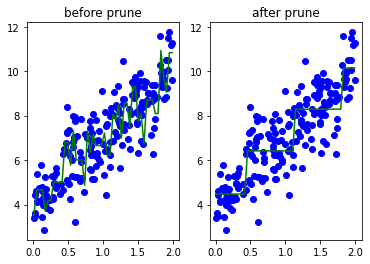

In [3]:
m=200
X = 2 * np.random.rand(m,1) # X 是列向量
y = 4 +3*X +np.random.randn(m,1) #Y 也是列向量

myCARTR = CARTRegression(min_sample=10,max_depth=10)
myCARTR.fit(X,y)
print("剪枝前树的节点数量和叶节点数量：",myCARTR.nodes_nums())
#X_new = np.array([[np.min(X)],[np.max(X)]])
X_new = np.linspace(np.min(X),np.max(X),50)[:,np.newaxis]
y_new = myCARTR.predict(X_new)
plt.subplot(121)
plt.title("before prune")
plt.plot(X,y,'ob')
plt.plot(X_new,y_new,'-g')
myCARTR.prune(alpha= 5)
print("剪枝后树的节点数量和叶节点数量：",myCARTR.nodes_nums())
y_new = myCARTR.predict(X_new)
plt.subplot(122)
plt.title("after prune")
plt.plot(X,y,'ob')
plt.plot(X_new,y_new,'-g')
plt.show()
